# Big Mart Sales Prediction

### Load Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb

In [2]:
train_df = pd.read_csv(r"C:/Users/user/Documents/datasets/big_mart_train.csv")
test_df = pd.read_csv(r"C:/Users/user/Documents/datasets/big_mart_test.csv")

In [60]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Non-Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
Ra

In [6]:
test_df['Item_Outlet_Sales'] = np.nan

In [7]:
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,NaN
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN


In [8]:
combined_df = pd.merge(train_df, test_df, how='outer')
combined_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [10]:
combined_df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN


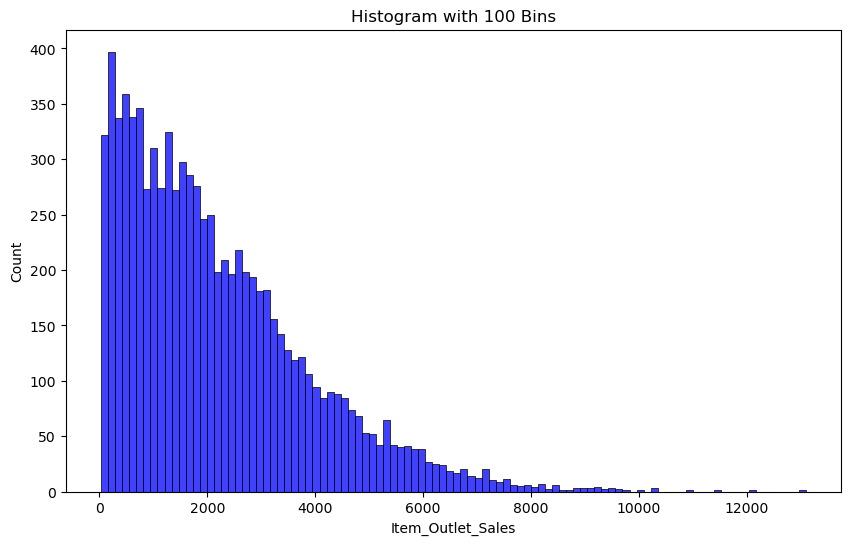

In [11]:
plt.figure(figsize=(10, 6))

# Plot histogram with Seaborn
sns.histplot(combined_df['Item_Outlet_Sales'], bins=100, kde=False, color='blue')

# Set plot labels and title
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Count')
plt.title('Histogram with 100 Bins')

# Show the plot
plt.show()

As you can see, it is a right-skewd variable, we would need some transformation to treat its skewness

In [12]:
# import sweetviz as sv

In [13]:
# my_report = sv.analyze(combined_df)
# my_report.show_html()

In [14]:
# my_report.show_notebook()

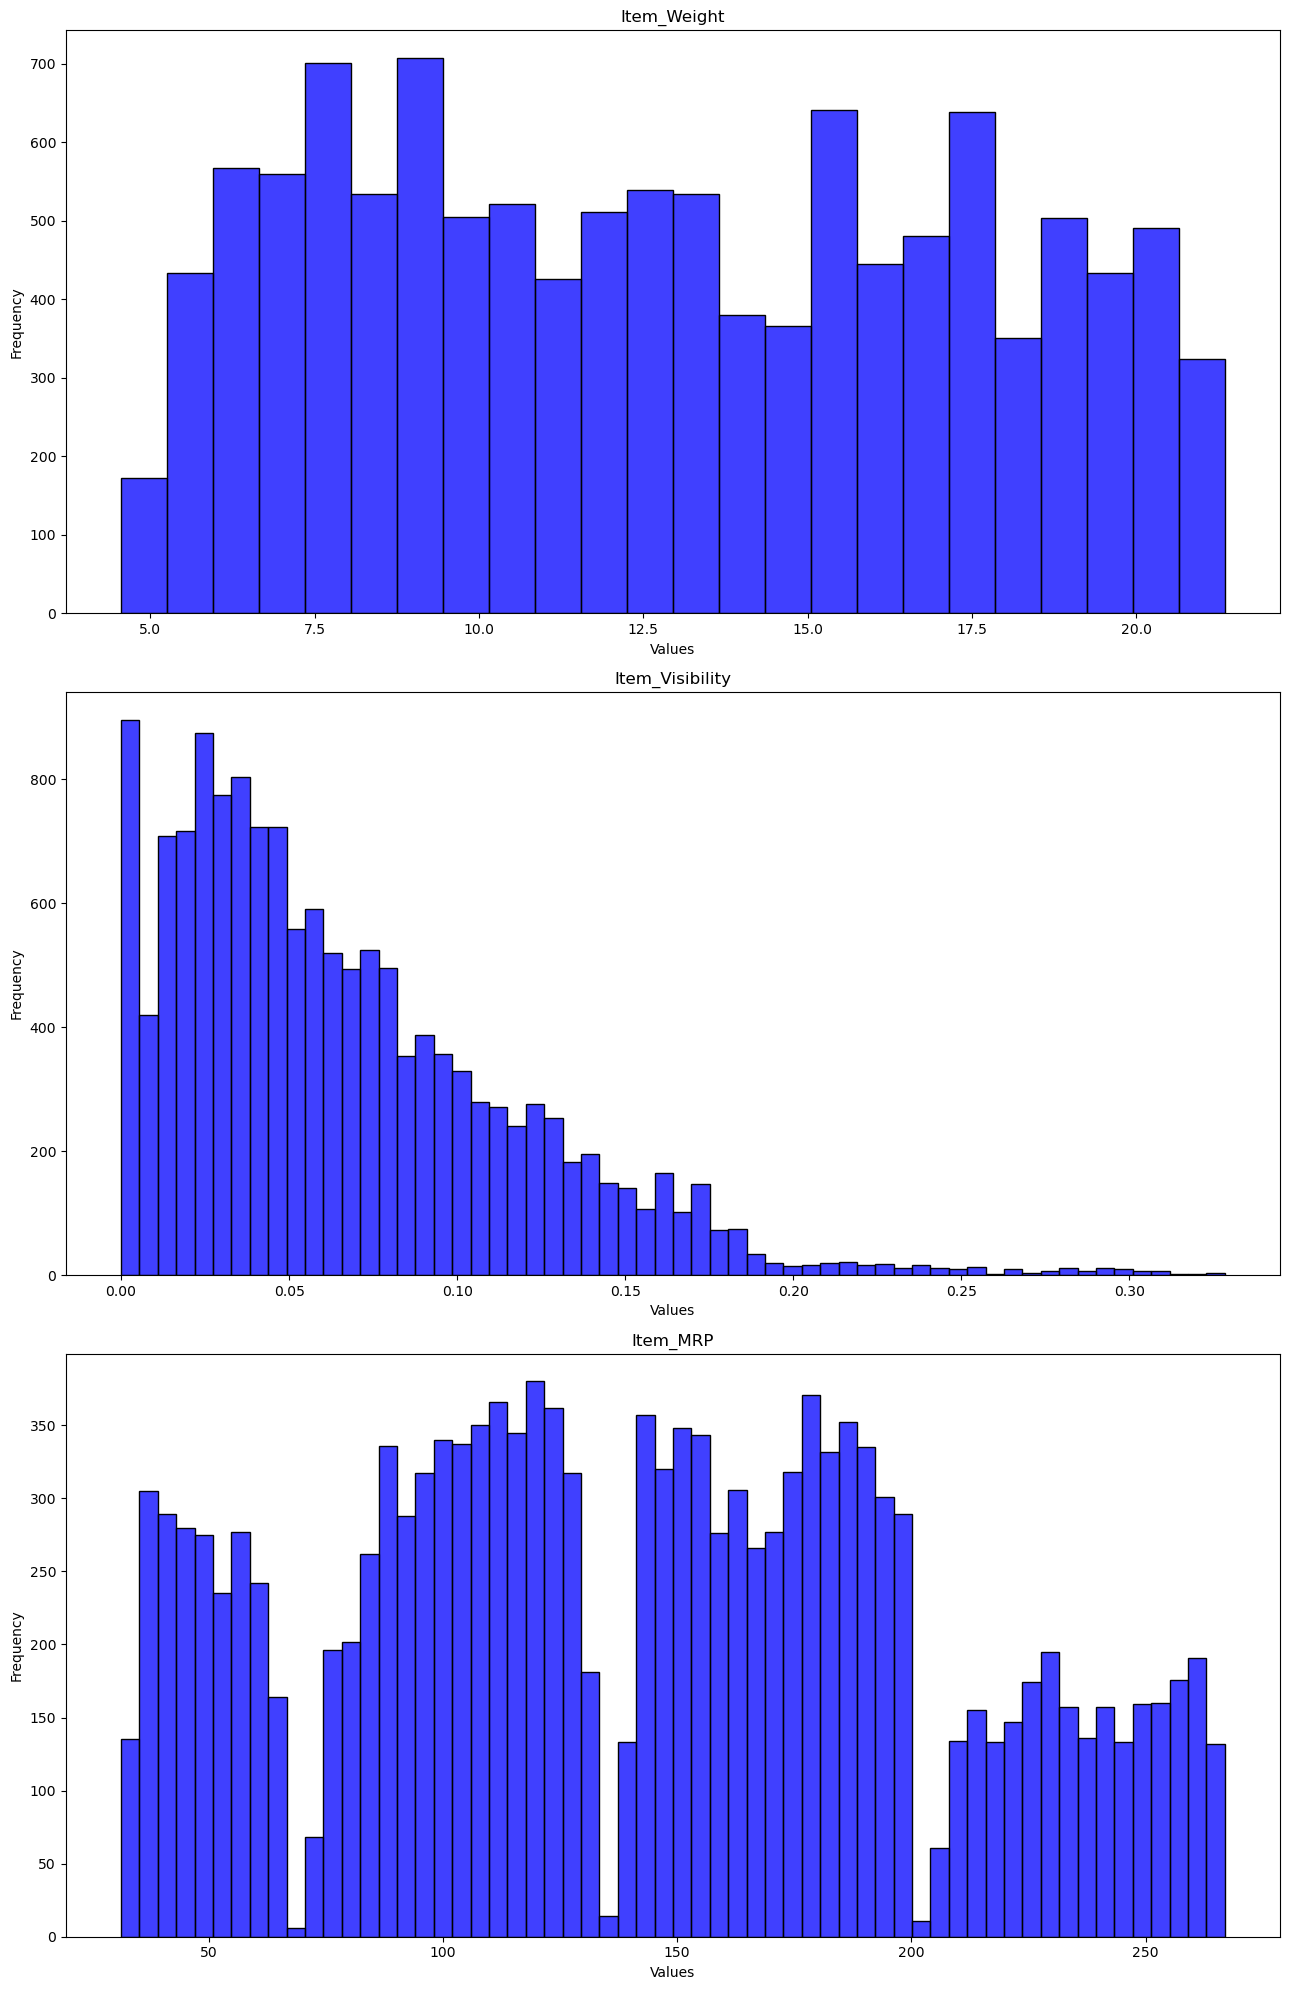

In [15]:
# Set the figure size and create subplots
fig, axes = plt.subplots(3, 1, figsize=(13, 20))  # 1 row, 3 columns

# Plot histograms with Seaborn
sns.histplot(combined_df['Item_Weight'], kde=False, color='blue', ax=axes[0])
axes[0].set_title('Item_Weight')

sns.histplot(combined_df['Item_Visibility'], kde=False, color='blue', ax=axes[1])
axes[1].set_title('Item_Visibility')

sns.histplot(combined_df['Item_MRP'], bins=60, kde=False, color='blue', ax=axes[2])
axes[2].set_title('Item_MRP')

# Set common labels
for ax in axes:
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

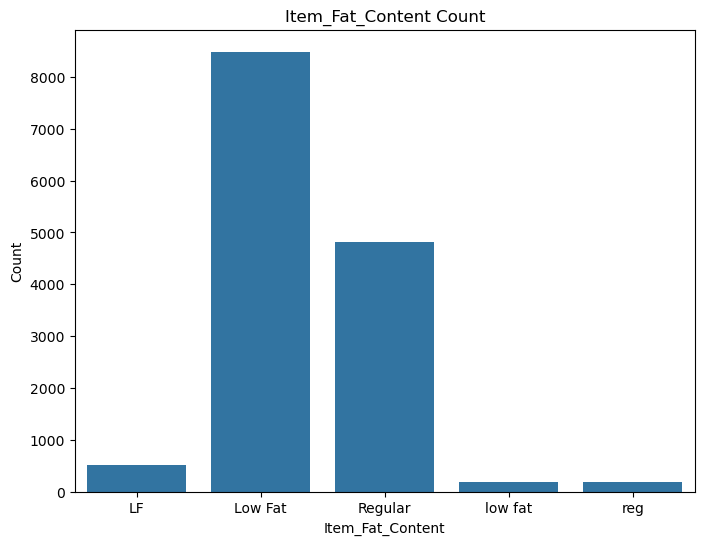

In [16]:
# Group by 'Item_Fat_Content' and calculate the count
grouped_data = combined_df.groupby('Item_Fat_Content').size().reset_index(name='Count')

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Item_Fat_Content', y='Count', data=grouped_data)
plt.title('Item_Fat_Content Count')
plt.xlabel('Item_Fat_Content')
plt.ylabel('Count')

# Show the plot
plt.show()

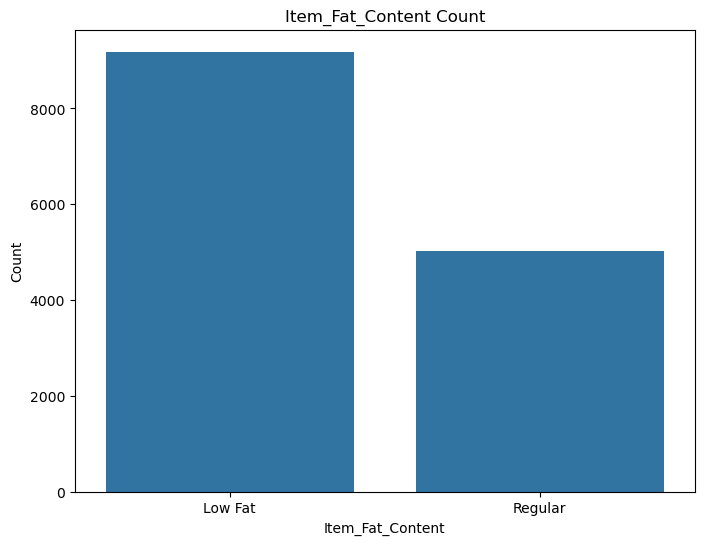

In [17]:
# Replace values in 'Item_Fat_Content' column
combined_df['Item_Fat_Content'].replace({"LF": "Low Fat", "low fat": "Low Fat", "reg": "Regular"}, inplace=True)

# Group by 'Item_Fat_Content' and calculate the count
grouped_data = combined_df.groupby('Item_Fat_Content').size().reset_index(name='Count')

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Item_Fat_Content', y='Count', data=grouped_data)
plt.title('Item_Fat_Content Count')
plt.xlabel('Item_Fat_Content')
plt.ylabel('Count')

# Show the plot
plt.show()


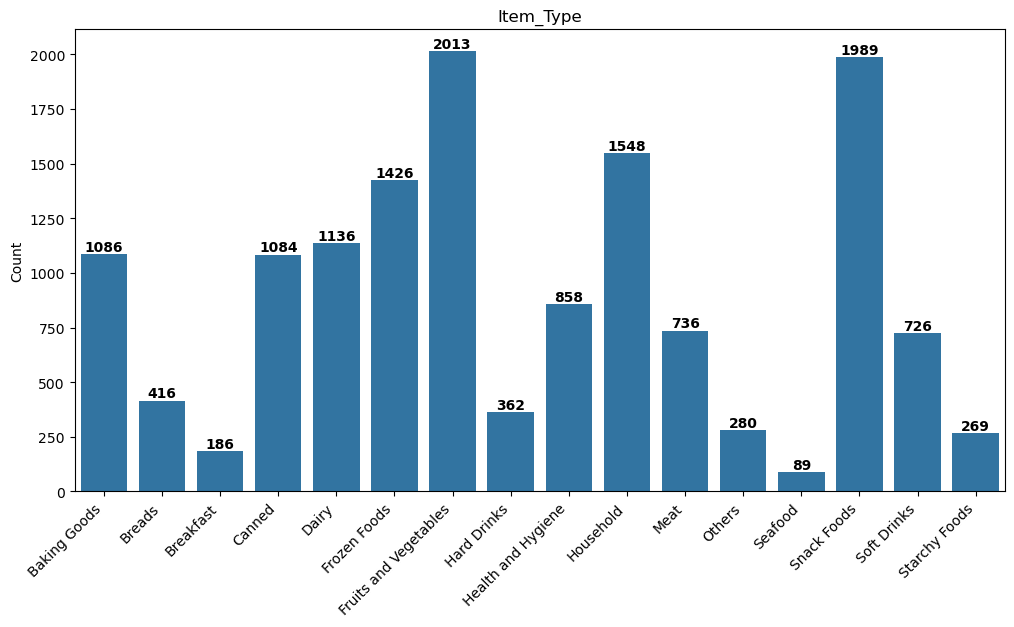

In [18]:
# Group by 'Item_Type' and calculate the count
grouped_data = combined_df.groupby('Item_Type').size().reset_index(name='Count')

# Plot the bar chart with labels and rotation
plt.figure(figsize=(12, 6))
sns.barplot(x='Item_Type', y='Count', data=grouped_data)
plt.xlabel('')
plt.ylabel('Count')
plt.title('Item_Type')

# Add labels with counts
for index, row in grouped_data.iterrows():
    plt.text(index, row['Count'], str(row['Count']), ha='center', va='bottom', fontweight='bold', color='black')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


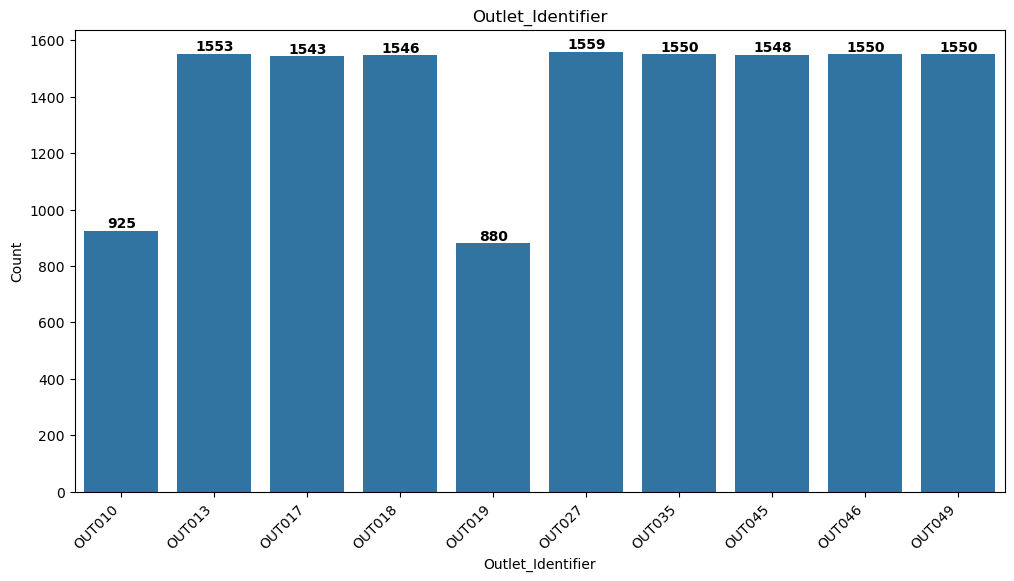

In [19]:
# Group by 'Outlet_Identifier' and calculate the count
grouped_data = combined_df.groupby('Outlet_Identifier').size().reset_index(name='Count')

# Plot the bar chart with labels and rotation
plt.figure(figsize=(12, 6))
sns.barplot(x='Outlet_Identifier', y='Count', data=grouped_data)
plt.ylabel('Count')
plt.title('Outlet_Identifier')

# Add labels with counts
for index, row in grouped_data.iterrows():
    plt.text(index, row['Count'], str(row['Count']), ha='center', va='bottom', fontweight='bold', color='black')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


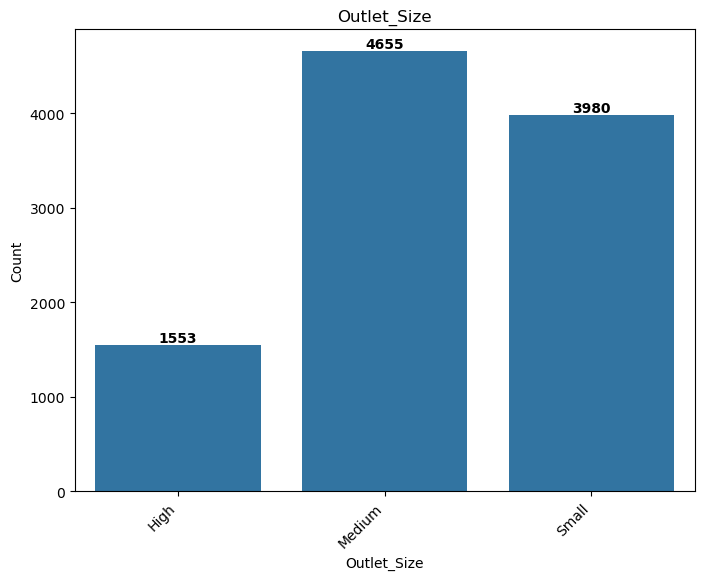

In [20]:
# Group by 'Outlet_Size' and calculate the count
grouped_data = combined_df.groupby('Outlet_Size').size().reset_index(name='Count')

# Plot the bar chart with labels and rotation
plt.figure(figsize=(8, 6))
sns.barplot(x='Outlet_Size', y='Count', data=grouped_data)
plt.ylabel('Count')
plt.title('Outlet_Size')

# Add labels with counts
for index, row in grouped_data.iterrows():
    plt.text(index, row['Count'], str(row['Count']), ha='center', va='bottom', fontweight='bold', color='black')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


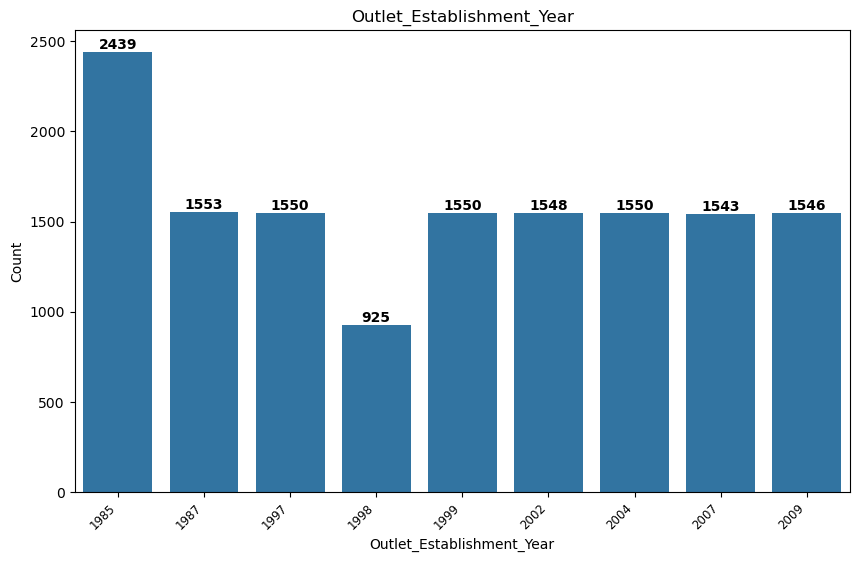

In [21]:
# Convert 'Outlet_Establishment_Year' to categorical
combined_df['Outlet_Establishment_Year'] = combined_df['Outlet_Establishment_Year'].astype('category')

# Group by 'Outlet_Establishment_Year' and calculate the count
grouped_data = combined_df.groupby('Outlet_Establishment_Year', observed=False).size().reset_index(name='Count')

# Plot the bar chart with labels
plt.figure(figsize=(10, 6))
sns.barplot(x='Outlet_Establishment_Year', y='Count', data=grouped_data)
plt.ylabel('Count')
plt.xlabel('Outlet_Establishment_Year')
plt.title('Outlet_Establishment_Year')

# Add labels with counts
for index, row in grouped_data.iterrows():
    plt.text(index, row['Count'], str(row['Count']), ha='center', va='bottom', fontweight='bold', color='black')

# Adjust x-axis text size for better visibility
plt.xticks(rotation=45, ha='right', fontsize=8.5)

# Show the plot
plt.show()


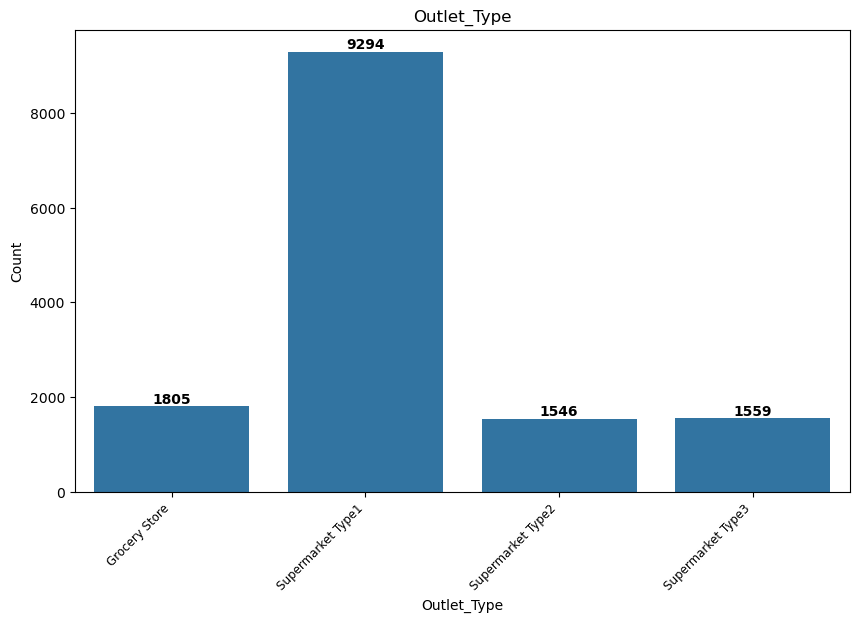

In [22]:
# Group by 'Outlet_Type' and calculate the count
grouped_data = combined_df.groupby('Outlet_Type').size().reset_index(name='Count')

# Plot the bar chart with labels
plt.figure(figsize=(10, 6))
sns.barplot(x='Outlet_Type', y='Count', data=grouped_data)
plt.ylabel('Count')
plt.title('Outlet_Type')

# Add labels with counts
for index, row in grouped_data.iterrows():
    plt.text(index, row['Count'], str(row['Count']), ha='center', va='bottom', fontweight='bold', color='black')

# Adjust x-axis text size for better visibility
plt.xticks(rotation=45, ha='right', fontsize=8.5)

# Show the plot
plt.show()


In [23]:
train_df = combined_df.iloc[:len(train_df)]
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


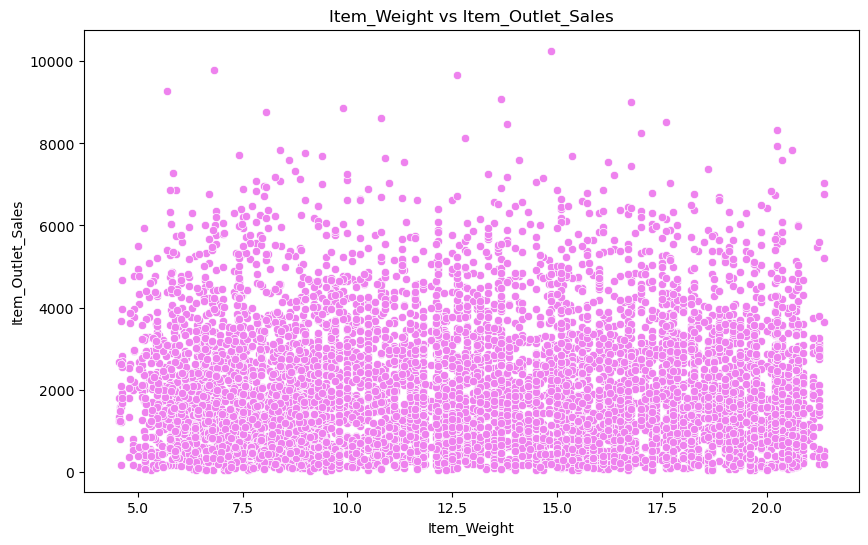

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales', data=train_df, color='violet')
plt.title('Item_Weight vs Item_Outlet_Sales')
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.show()

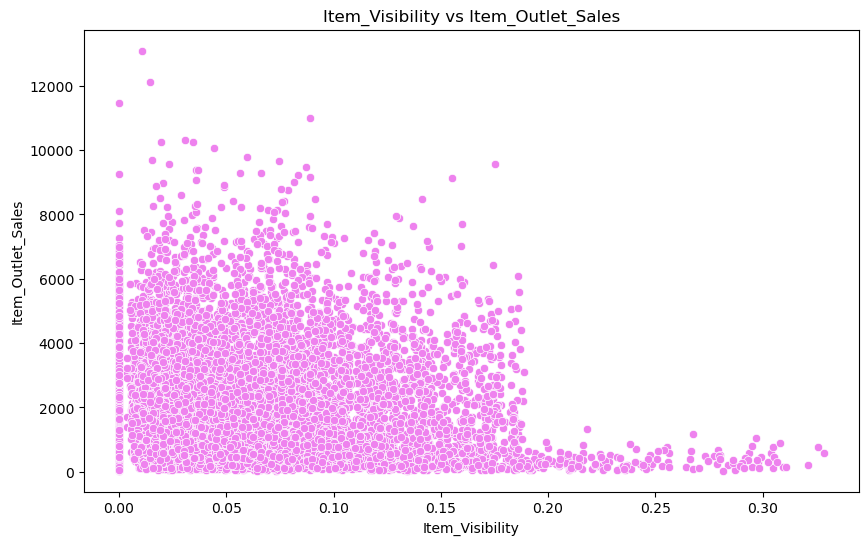

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales', data=train_df, color='violet')
plt.title('Item_Visibility vs Item_Outlet_Sales')
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.show()

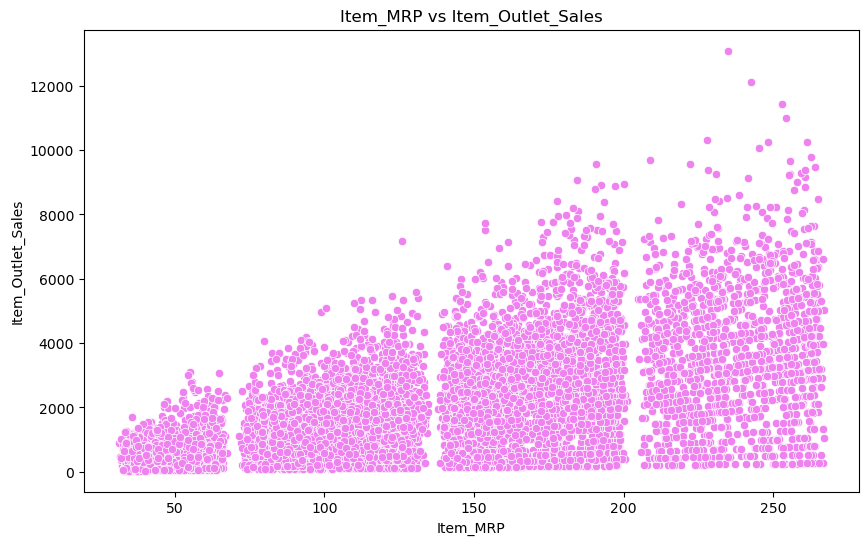

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=train_df, color='violet')
plt.title('Item_MRP vs Item_Outlet_Sales')
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()

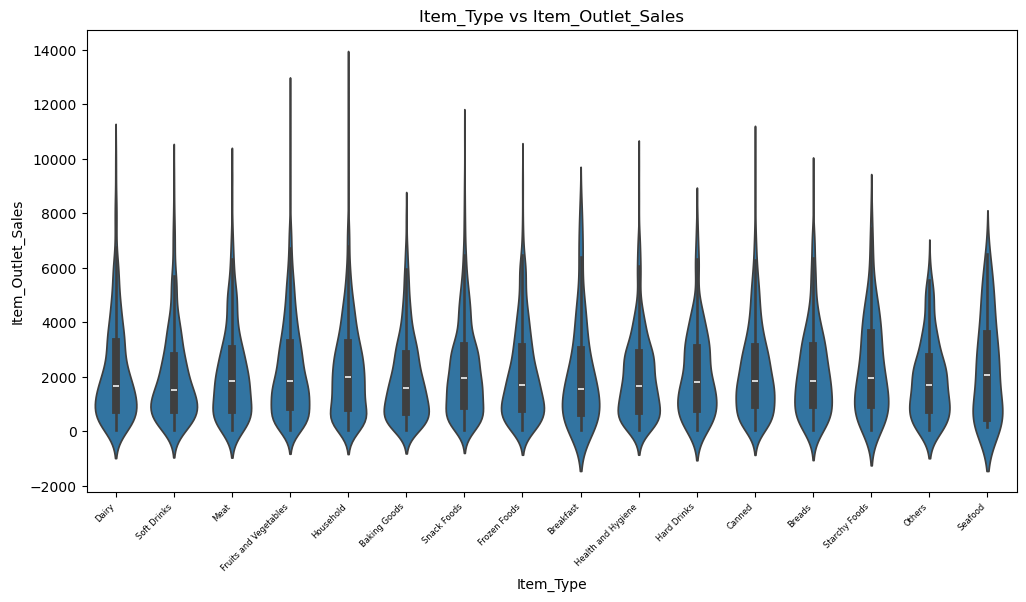

In [27]:
# Plotting Item_Type vs Item_Outlet_Sales using a violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Item_Type', y='Item_Outlet_Sales', data=train_df)
plt.title('Item_Type vs Item_Outlet_Sales')
plt.xlabel('Item_Type')
plt.ylabel('Item_Outlet_Sales')
plt.xticks(rotation=45, ha='right', size=6)
plt.show()

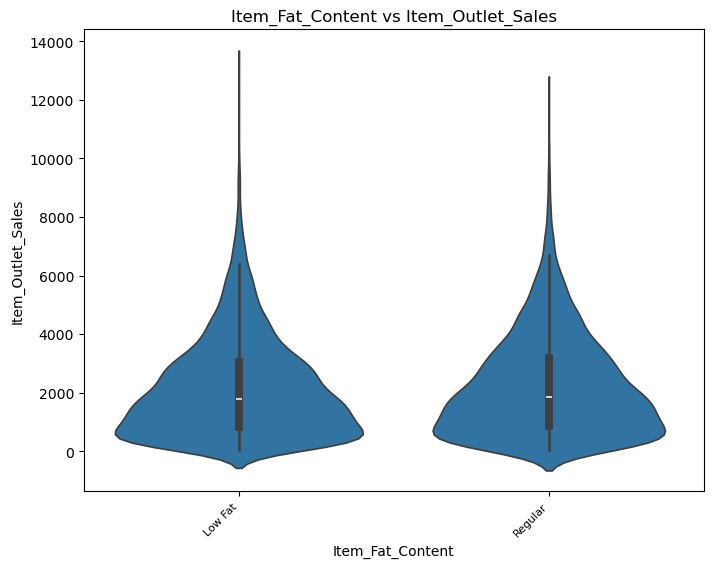

In [28]:
# Plotting Item_Fat_Content vs Item_Outlet_Sales using a violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=train_df)
plt.title('Item_Fat_Content vs Item_Outlet_Sales')
plt.xlabel('Item_Fat_Content')
plt.ylabel('Item_Outlet_Sales')
plt.xticks(rotation=45, ha='right', size=8)
plt.show()

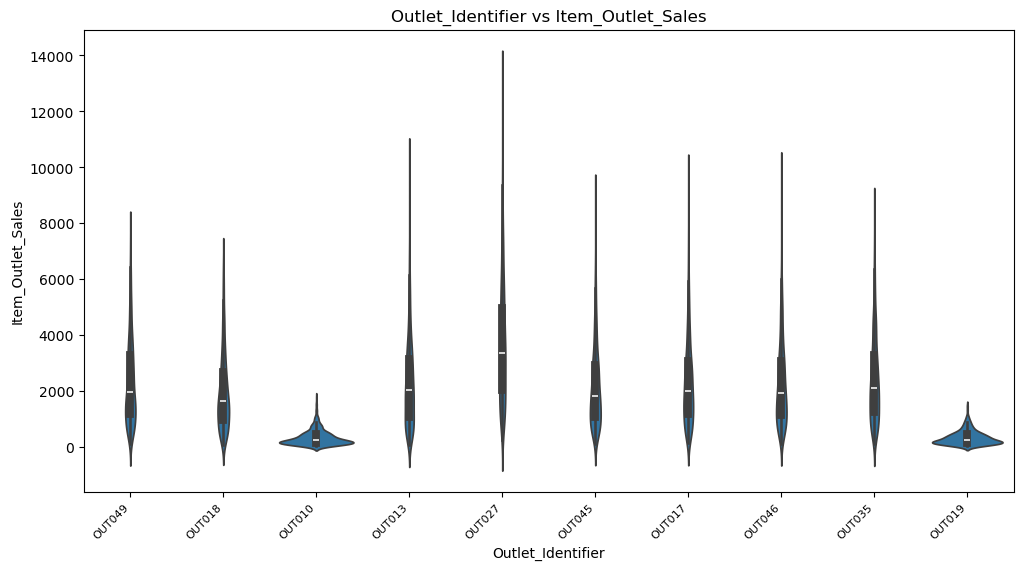

In [29]:
# Plotting Outlet_Identifier vs Item_Outlet_Sales using a violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=train_df)
plt.title('Outlet_Identifier vs Item_Outlet_Sales')
plt.xlabel('Outlet_Identifier')
plt.ylabel('Item_Outlet_Sales')
plt.xticks(rotation=45, ha='right', size=8)
plt.show()

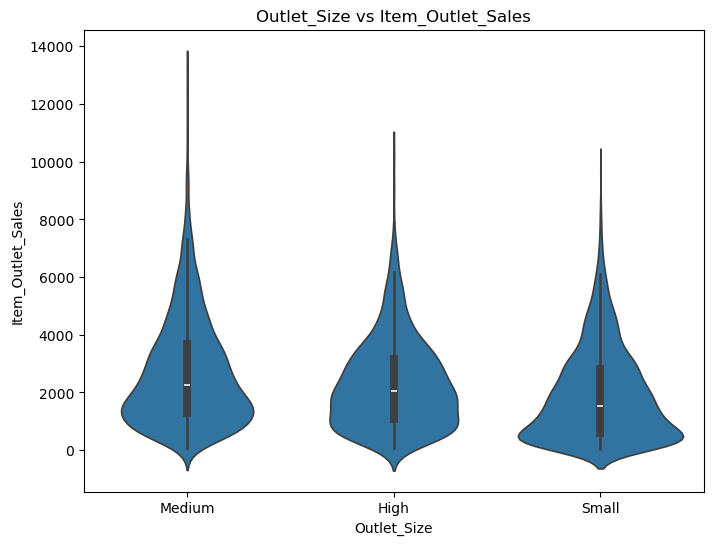

In [30]:
# Plotting Outlet_Size vs Item_Outlet_Sales using a violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='Outlet_Size', y='Item_Outlet_Sales', data=train_df)
plt.title('Outlet_Size vs Item_Outlet_Sales')
plt.xlabel('Outlet_Size')
plt.ylabel('Item_Outlet_Sales')
plt.show()


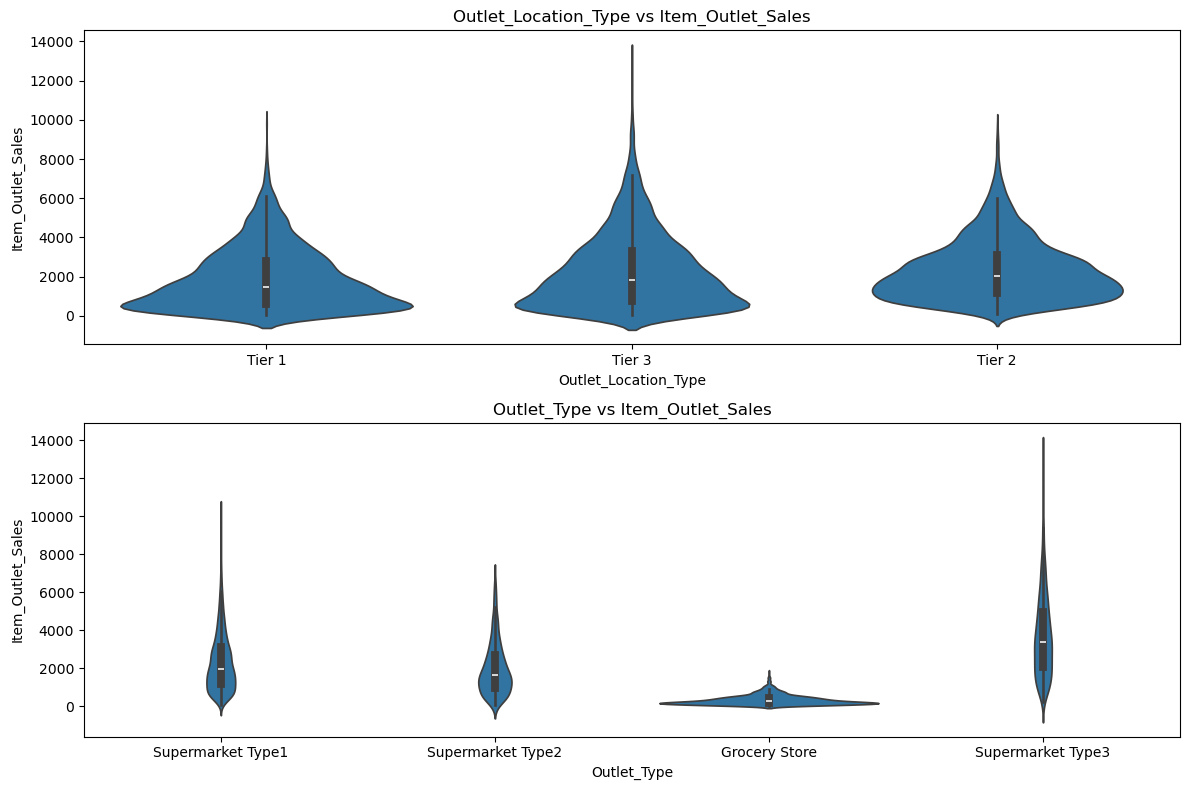

In [31]:
# Plotting Outlet_Location_Type vs Item_Outlet_Sales
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
sns.violinplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=train_df)
plt.title('Outlet_Location_Type vs Item_Outlet_Sales')
plt.xlabel('Outlet_Location_Type')
plt.ylabel('Item_Outlet_Sales')

# Plotting Outlet_Type vs Item_Outlet_Sales
plt.subplot(2, 1, 2)
sns.violinplot(x='Outlet_Type', y='Item_Outlet_Sales', data=train_df)
plt.title('Outlet_Type vs Item_Outlet_Sales')
plt.xlabel('Outlet_Type')
plt.ylabel('Item_Outlet_Sales')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [32]:
combined_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [33]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            14204 non-null  object  
 1   Item_Weight                11765 non-null  float64 
 2   Item_Fat_Content           14204 non-null  object  
 3   Item_Visibility            14204 non-null  float64 
 4   Item_Type                  14204 non-null  object  
 5   Item_MRP                   14204 non-null  float64 
 6   Outlet_Identifier          14204 non-null  object  
 7   Outlet_Establishment_Year  14204 non-null  category
 8   Outlet_Size                10188 non-null  object  
 9   Outlet_Location_Type       14204 non-null  object  
 10  Outlet_Type                14204 non-null  object  
 11  Item_Outlet_Sales          8523 non-null   float64 
dtypes: category(1), float64(4), object(7)
memory usage: 1.2+ MB


In [34]:
combined_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,11765.0,12.792854,4.652502,4.555,8.710000,12.600000,16.750000,21.350000
Item_Visibility,14204.0,0.065953,0.051459,0.000,0.027036,0.054021,0.094037,0.328391
Item_MRP,14204.0,141.004977,62.086938,31.290,94.012000,142.247000,185.855600,266.888400
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [35]:
# Replace missing values in 'Item_Weight' with the mean value
combined_df['Item_Weight'].fillna(combined_df['Item_Weight'].mean(), inplace=True)

In [36]:
# combined_df.loc[combined_df['Item_Weight'] == 0, 'Item_Weight'] = combined_df['Item_Weight'].mean()
combined_df['Item_Visibility'] = combined_df['Item_Visibility'].replace(0, combined_df['Item_Visibility'].mean())

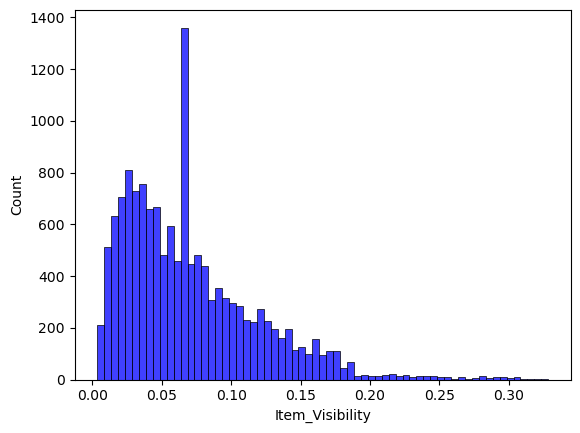

In [37]:
sns.histplot(combined_df['Item_Visibility'], kde=False, color='blue')
plt.show()

In [38]:
# Assuming 'combi' is your DataFrame
perishable = ["Breads", "Breakfast", "Dairy", "Fruits and Vegetables", "Meat", "Seafood"]
non_perishable = ["Baking Goods", "Canned", "Frozen Foods", "Hard Drinks", "Health and Hygiene", "Household", "Soft Drinks"]

# Create a new feature 'Item_Type_new'
combined_df['Item_Type_new'] = 'not_sure'
combined_df.loc[combined_df['Item_Type'].isin(perishable), 'Item_Type_new'] = 'perishable'
combined_df.loc[combined_df['Item_Type'].isin(non_perishable), 'Item_Type_new'] = 'non_perishable'

# Check the DataFrame after creating the new feature
combined_df[['Item_Type', 'Item_Type_new']].head()

,Item_Type,Item_Type_new
0,Dairy,perishable
1,Soft Drinks,non_perishable
2,Meat,perishable
3,Fruits and Vegetables,perishable
4,Household,non_perishable


In [39]:
combined_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_new
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,perishable
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,non_perishable
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,perishable
3,FDX07,19.20,Regular,0.065953,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,perishable
4,NCD19,8.93,Low Fat,0.065953,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,non_perishable


In [40]:
table_result = pd.crosstab(combined_df['Item_Type'], combined_df['Item_Identifier'].str[:2])

In [41]:
table_result

Item_Identifier,DR,FD,NC
Item_Type,,,
Baking Goods,0,1086,0
Breads,0,416,0
Breakfast,0,186,0
Canned,0,1084,0
Dairy,229,907,0
Frozen Foods,0,1426,0
Fruits and Vegetables,0,2013,0
Hard Drinks,362,0,0
Health and Hygiene,0,0,858


In [42]:
combined_df['Item_category'] = combined_df['Item_Identifier'].str[:2]

In [43]:
combined_df.loc[combined_df['Item_category'] == 'NC', 'Item_Fat_Content'] = 'Non-Edible'

In [44]:
combined_df['Outlet_Years'] = 2013 - pd.to_numeric(combined_df['Outlet_Establishment_Year'])

In [45]:
combined_df['Outlet_Establishment_Year'].dtype

CategoricalDtype(categories=[1985, 1987, 1997, 1998, 1999, 2002, 2004, 2007, 2009], ordered=False, categories_dtype=int64)

In [46]:
combined_df['price_per_unit_wt'] = combined_df['Item_MRP'] / combined_df['Item_Weight']

In [47]:
combined_df['Item_MRP_clusters'] = pd.cut(
    combined_df['Item_MRP'],
    bins=[-float('inf'), 69, 136, 203, float('inf')],
    labels=['1st', '2nd', '3rd', '4th'],
    right=False
)

In [48]:
combined_df['Outlet_Size_num'] = combined_df['Outlet_Size'].map({'Small': 0, 'Medium': 1, 'High': 2})

In [49]:
combined_df['Outlet_Location_Type_num'] = combined_df['Outlet_Location_Type'].map({'Tier 3': 0, 'Tier 2': 1, 'Tier 1': 2})

In [50]:
combined_df.drop(['Outlet_Size', 'Outlet_Location_Type'], axis=1, inplace=True)

In [51]:
combined_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Type,Item_Outlet_Sales,Item_Type_new,Item_category,Outlet_Years,price_per_unit_wt,Item_MRP_clusters,Outlet_Size_num,Outlet_Location_Type_num
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Supermarket Type1,3735.1380,perishable,FD,14,26.861204,4th,1.0,2
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Supermarket Type2,443.4228,non_perishable,DR,4,8.153581,1st,1.0,0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Supermarket Type1,2097.2700,perishable,FD,14,8.092457,3rd,1.0,2
3,FDX07,19.20,Regular,0.065953,Fruits and Vegetables,182.0950,OUT010,1998,Grocery Store,732.3800,perishable,FD,15,9.484115,3rd,NaN,0
4,NCD19,8.93,Non-Edible,0.065953,Household,53.8614,OUT013,1987,Supermarket Type1,994.7052,non_perishable,NC,26,6.031512,1st,2.0,0


In [52]:
columns_to_drop = ["Item_Identifier", "Outlet_Establishment_Year", "Item_Type"]
data_for_encoding = combined_df.drop(columns=columns_to_drop)

In [53]:
# Perform one-hot encoding
ohe_df = pd.get_dummies(data_for_encoding, drop_first=True)

In [54]:
# Concatenate 'Item_Identifier' with one-hot encoded DataFrame
combi = pd.concat([combined_df['Item_Identifier'], ohe_df], axis=1)

In [55]:
combi.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years,price_per_unit_wt,Outlet_Size_num,Outlet_Location_Type_num,Item_Fat_Content_Non-Edible,...,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_new_not_sure,Item_Type_new_perishable,Item_category_FD,Item_category_NC,Item_MRP_clusters_2nd,Item_MRP_clusters_3rd,Item_MRP_clusters_4th
0,FDA15,9.30,0.016047,249.8092,3735.1380,14,26.861204,1.0,2,False,...,True,False,False,False,True,True,False,False,False,True
1,DRC01,5.92,0.019278,48.2692,443.4228,4,8.153581,1.0,0,False,...,False,True,False,False,False,False,False,False,False,False
2,FDN15,17.50,0.016760,141.6180,2097.2700,14,8.092457,1.0,2,False,...,True,False,False,False,True,True,False,False,True,False
3,FDX07,19.20,0.065953,182.0950,732.3800,15,9.484115,NaN,0,False,...,False,False,False,False,True,True,False,False,True,False
4,NCD19,8.93,0.065953,53.8614,994.7052,26,6.031512,2.0,0,True,...,True,False,False,False,False,False,True,False,False,False


In [56]:
# Logarithmic transformation for 'Item_Visibility'
combi['Item_Visibility'] = np.log(combi['Item_Visibility'] + 1)

# Logarithmic transformation for 'price_per_unit_wt'
combi['price_per_unit_wt'] = np.log(combi['price_per_unit_wt'] + 1)

In [57]:
from sklearn.preprocessing import StandardScaler

# Assuming 'combi' is your DataFrame
# Assuming 'Item_Outlet_Sales' is the target variable

# Extract numeric features
num_vars = combi.select_dtypes(include='number').columns
num_vars_names = list(num_vars)

# Separate target variable
target_variable = 'Item_Outlet_Sales'
num_vars_names.remove(target_variable)

# Create DataFrame with only numeric features
combi_numeric = combi[num_vars_names]

# Apply centering and scaling
scaler = StandardScaler()
combi_numeric_norm = scaler.fit_transform(combi_numeric)

# Convert the result back to a DataFrame
combi_numeric_norm = pd.DataFrame(combi_numeric_norm, columns=num_vars_names)

In [58]:
# Assuming 'combi' is your DataFrame
# Assuming 'Item_Outlet_Sales' is the target variable

# Remove numeric independent variables from the original DataFrame
combi = combi.drop(num_vars_names, axis=1)

# Concatenate the normalized numeric features with the original DataFrame
combi = pd.concat([combi, combi_numeric_norm], axis=1)

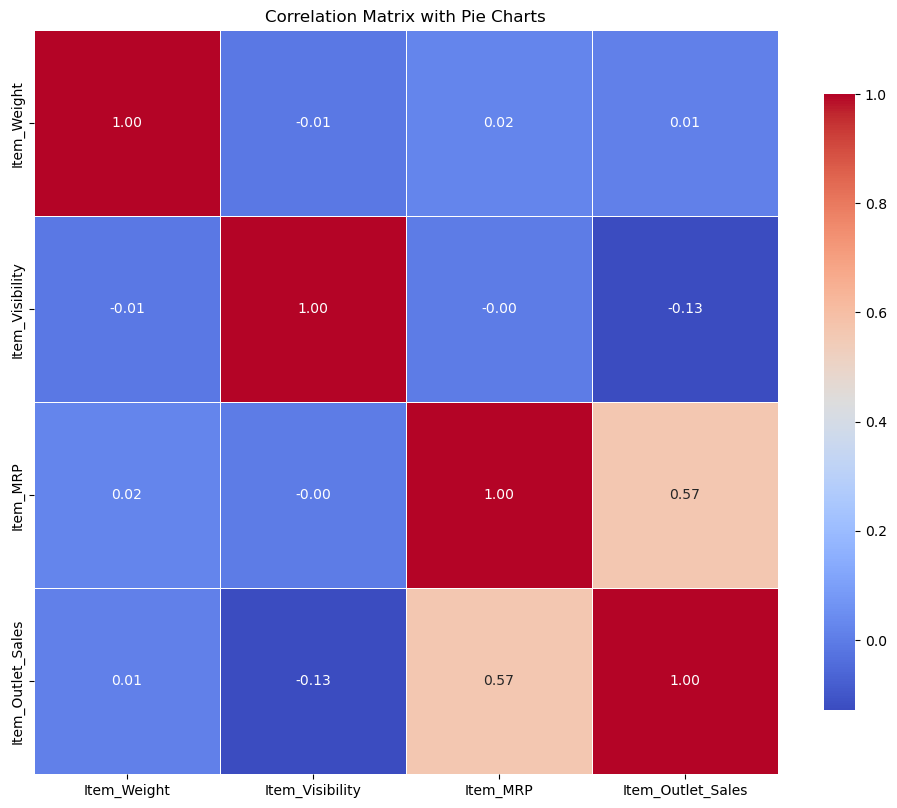

In [59]:
# Calculate the correlation matrix
cor_train = train_df.drop(columns=["Item_Identifier"]).corr(numeric_only=True)

# Create a heatmap with pie charts
plt.figure(figsize=(12, 10))
sns.heatmap(cor_train, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True, cbar_kws={"shrink": 0.8})
plt.title("Correlation Matrix with Pie Charts")
plt.show()

In [61]:
import statsmodels.api as sm

In [68]:
# Assuming 'train' is your DataFrame
# Assuming 'Item_Identifier' is a column to exclude

# Drop 'Item_Identifier' column
train_without_identifier = train_df.drop(columns=["Item_Identifier"])

# Define dependent variable and independent variables
dependent_variable = 'Item_Outlet_Sales'
independent_variables = [col for col in train_without_identifier.columns if col != dependent_variable]

# Drop rows with missing values
train_without_identifier = train_without_identifier.dropna()

# Fit the linear regression model
X = train_without_identifier[independent_variables]
X = sm.add_constant(X)  # Add a constant term for the intercept
y = pd.to_numeric(train_without_identifier[dependent_variable])

linear_reg_mod = sm.OLS(y, X).fit()

# Print summary
print(linear_reg_mod.summary())


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

array([3735.138 ,  443.4228, 2097.27  , ..., 1193.1136, 1845.5976,
        765.67  ])

In [65]:
X.shape

(8523, 11)

In [69]:
X

,const,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1.0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,1.0,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,1.0,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
4,1.0,8.930,Non-Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1
5,1.0,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2
...,...,...,...,...,...,...,...,...,...,...,...
8517,1.0,20.750,Regular,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1
8518,1.0,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1
8520,1.0,10.600,Non-Edible,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1
8521,1.0,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2
